In [2]:
%load_ext autoreload
%autoreload 2

from imports import *
from models import *
from data import *
from utils import *

from rand_configs import RAND_CONFIGS
from rand_experiment import *

In [2]:
# def show_all_rand(exp_name, train):
#     exp = Rand_Experiment(exp_name, RAND_CONFIGS[exp_name])
#     exp.plot()
#     _ = visualize_rand(exp, train=train, verbose=True)
#     cluster_velocities_rand(exp, train=train)
#     cluster_fixed_velocities_rand(exp, train=train)


# def visualize_rand(experiment, train, index=None, verbose=True):
#     loss_fn = experiment.loss_fn

#     dataset = experiment.train_loader.dataset if train else experiment.test_loader.dataset
#     eps = dataset.eps_shift
#     all_v = torch.cartesian_prod(torch.arange(-eps, eps + 1), torch.arange(-eps, eps + 1)) 

#     if not index:
#         index = torch.randint(0, len(dataset), size=(1,)).item()

#         sample = dataset[index]
#     else:
#         assert isinstance(index, int)

#         sample = dataset[index]

#     img1 = sample[0].to(experiment.device).unsqueeze(0)
#     img2 = sample[1].to(experiment.device).unsqueeze(0)
#     gt_v = sample[2].numpy()

#     model = experiment.model
#     model.eval()

#     with torch.no_grad():
#         recons = model(img1, img2)
                
#         v_ind = model.get_v(img1, img2).squeeze().argmax().detach().cpu().item()
#         pred_v = all_v[v_ind].numpy()

#         loss = loss_fn(recons.unsqueeze(1), img2).detach().cpu().item()

#         if verbose:
#             print("Number of model parameters: {}".format(count_parameters(model)))

#             print("Predicted velocity:", pred_v)
#             print("Ground truth velocity:", gt_v)
#             print("Loss:", loss)

#             imshow_gray(img1)
#             imshow_gray(img2)
#             imshow_gray(recons.squeeze())
            
#             if isinstance(experiment.model, LR):
#                 v = model.get_v(img1, img2)

#                 v_L = model.A_v_L(v).reshape(-1, 8, 8)
#                 v_R = model.A_v_R(v).reshape(-1, 8, 8)

#                 imshow_gray(v_L)
#                 imshow_gray(v_R)


#         return pred_v, gt_v


# def cluster_velocities_rand(experiment, train):
#     eps = experiment.train_loader.dataset.eps_shift

#     coords = torch.cartesian_prod(torch.arange(-eps, eps + 1), torch.arange(-eps, eps + 1)) 
    
#     # colorlist = []
#     # all_colors = plt.get_cmap("viridis").colors
#     # for i in range(0, len(all_colors), len(all_colors)//len(coords)):
#     #    colorlist.append(all_colors[i])
#     colorlist = list(mp.colors.cnames.keys())
#     random.shuffle(colorlist)
#     colorlist = colorlist[:len(coords)]

#     colorlabels = {tuple(coord.numpy()) : colorlist[i] for i, coord in enumerate(coords)}

#     points = []
#     colors = []

#     for _ in range(1000):
#         pred_v, gt_v = visualize_rand(experiment, train=train, verbose=False)

#         points.append(pred_v)
#         colors.append(colorlabels[tuple(gt_v)])

    
#     fig = plt.figure()

#     plt.scatter(*np.array(points).T, color=colors, s=50, alpha=0.03)
#     plt.xlabel("$\delta x$")
#     plt.ylabel("$\delta y$")
    
#     plt.tight_layout()


# def cluster_fixed_velocities_rand(experiment, train):
#     num_images = 2

#     dataset = experiment.train_loader.dataset if train else experiment.test_loader.dataset
#     eps = dataset.eps_shift
    
#     indices = torch.randint(0, len(dataset), size=(num_images,)).tolist()
#     shifts = torch.cartesian_prod(torch.arange(-eps, eps + 1), torch.arange(-eps, eps + 1)) 
#     colors = ['maroon', 'darkorange', 'darkkhaki', 'limegreen', 'aquamarine', 'royalblue', 'blueviolet', 'darkmagenta', 'slategray']

#     points = []
#     names = []

#     model = experiment.model
#     model.eval()

#     with torch.no_grad():
#         for i, ind in enumerate(indices):
#             for j, shift in enumerate(shifts):
#                 img1, img2, _ = dataset.shift_by(ind, shift.numpy())

#                 img1 = img1.to(experiment.device).unsqueeze(0)
#                 img2 = img2.to(experiment.device).unsqueeze(0)

#                 v_ind = model.get_v(img1, img2).squeeze().argmax().detach().cpu().item()
#                 pred_v = shifts[v_ind].numpy()

#                 points.append(pred_v)
#                 names.append(str(i) + "," + str(j))
    
#     fig = plt.figure()

#     splits = list(range(0, len(points), 9)) + [len(points)]
    
#     names_counter = 0
#     for i in range(len(splits)-1):
#         plt.scatter(*np.array(points[splits[i] : splits[i + 1]]).T, color=colors, s=50, alpha=0.5)

#         for p in points[splits[i] : splits[i + 1]]:
#             rand = torch.rand(1).item()
#             shift = 0.1 * rand if rand > 0.5 else -0.1 * rand
#             plt.annotate(names[names_counter], (p[0], p[1]), (p[0] + shift, p[1] + shift))
#             names_counter += 1

#     plt.xlabel("$\delta x$")
#     plt.ylabel("$\delta y$")

#     plt.tight_layout()

In [3]:
# exp = Rand_Experiment("shift1_rand_LR2_mse", RAND_CONFIGS["shift1_rand_LR2_mse"])
# model = exp.model
# dataset = exp.train_loader.dataset

# model.eval()

# vs = []
# gt_v = []

# for i in range(0, len(dataset), 100):
#     vs.append(model.get_v(dataset[i][0].cuda(), dataset[i][1].cuda()))
#     gt_v.append(tuple(dataset[i][2].numpy()))

# vs = torch.stack(vs).squeeze()

# fig = plt.figure()

# points = torch.pca_lowrank(vs, q=2)[0].detach().cpu().numpy()

# plt.scatter(*points.T)

# s = torch.svd(vs - vs.mean(dim=1).unsqueeze(1))[1]

# (s**2) / (s**2).sum()

# plt.plot(vs[torch.randint(0, 300, size=(1,)).item()].detach().cpu().numpy())

In [4]:


'''
contrastive loss visualization stuff
'''
def show_all_rand(exp_name, config_name, train):
    exp = Rand_Experiment(exp_name, RAND_CONFIGS[config_name])
    exp.plot()
    _ = visualize_rand(exp, train=train, verbose=True)
    cluster_velocities_rand(exp, train=train)

def visualize_rand(experiment, train, index=None, verbose=True):
    loss_fn = experiment.loss_fn

    model = experiment.model
    model.eval()

    dataset = experiment.train_loader.dataset if train else experiment.test_loader.dataset

    if not index:
        index = np.random.randint(0, len(dataset), size=(1,))[0]

        sample = dataset[index]
    else:
        assert isinstance(index, int)

        sample = dataset[index]

    i1 = sample[0].to(experiment.device).unsqueeze(0)
    i2 = sample[1].to(experiment.device).unsqueeze(0)
    i3 = sample[2].to(experiment.device).unsqueeze(0)
    gt_v = sample[3].numpy()


    with torch.no_grad():        
        #v_32, pred_i1_1 = model(i3.clone().detach(), i2.clone().detach())
        #v_11, pred_i1_2 = model(i1.clone().detach(), i1.clone().detach())

        #v_22, pred_i2 = model(i2.clone().detach(), i2.clone().detach())
        
        v_12, pred_i3_1 = model(i1.clone().detach(), i2.clone().detach())
        #v_33, pred_i3_2 = model(i3.clone().detach(), i3.clone().detach())

        loss, loss_categories = loss_fn(
            None, None, # predicted i1
            None, # predicted i2
            pred_i3_1.unsqueeze(1), None, # predicted i3
            i1, i2, i3, # ground-truth images
            None, None, None, # attraction terms
            v_12, None, # repel terms
        )

        pred_v = model.get_v(i1.clone().detach(), i2.clone().detach())[0].squeeze().detach().cpu().numpy()

        if verbose:
            print("Number of model parameters: {}".format(count_parameters(model)))

            loss_label = "Training" if train else "Testing"
            print(loss_label + " Loss: {}".format(loss.detach().cpu().item()))
            if loss_categories and len(loss_categories):
                for (key, value) in loss_categories.items():
                    print(loss_label + " " + key + ": {}".format(value))

            print("Predicted velocity:", pred_v)
            print("Ground truth velocity:", gt_v)

            fig, axes = plt.subplots(4, 3, figsize=(15, 13), constrained_layout=True)
            axes = axes.flatten()

            axes[0].imshow(i1.squeeze().detach().cpu().numpy(), cmap='gray', vmin=0.0, vmax=1.0)
            axes[0].set_title("GT i1")

            axes[1].imshow(i2.squeeze().detach().cpu().numpy(), cmap='gray', vmin=0.0, vmax=1.0)
            axes[1].set_title("GT i2")

            axes[2].imshow(i3.squeeze().detach().cpu().numpy(), cmap='gray', vmin=0.0, vmax=1.0)
            axes[2].set_title("GT i3")

            #im = axes[3].imshow(pred_i1_1.squeeze().detach().cpu().numpy(), cmap='gray')
            #axes[3].set_title("model(i3, i2) -> pred i1")

            #im = axes[4].imshow(pred_i2.squeeze().detach().cpu().numpy(), cmap='gray')
            #axes[4].set_title("model(i2, i2) -> pred i2")

            im = axes[5].imshow(pred_i3_1.squeeze().detach().cpu().numpy(), cmap='gray')
            axes[5].set_title("model(i1, i2) -> pred i3")

            #im = axes[6].imshow(pred_i1_2.squeeze().detach().cpu().numpy(), cmap='gray', vmin=0.0, vmax=1.0)
            #axes[6].set_title("model(i1, i1) -> pred i1")

            axes[7].set_visible(False)

            #im = axes[8].imshow(pred_i3_2.squeeze().detach().cpu().numpy(), cmap='gray')
            #axes[8].set_title("model(i3, i3) -> pred i3")

            fig.colorbar(im, ax=axes)

            if isinstance(experiment.model, LR):
                v = torch.Tensor(pred_v).unsqueeze(0).to(experiment.device)

                v_L = model.A_v_L(v).reshape(-1, 8, 8)
                v_R = model.A_v_R(v).reshape(-1, 8, 8)

                axes[9].imshow(v_L.squeeze().detach().cpu().numpy(), cmap='gray')#, vmin=-1.0, vmax=1.0)
                axes[9].set_title("L")

                axes[10].imshow(v_R.squeeze().detach().cpu().numpy(), cmap='gray')#, vmin=-1.0, vmax=1.0)
                axes[10].set_title("R")
            else:
                axes[9].set_visible(False)
                axes[10].set_visible(False)

            axes[11].set_visible(False)

        return pred_v, gt_v


def cluster_velocities_rand(experiment, train):
    eps = experiment.train_loader.dataset.eps_shift

    coords = torch.cartesian_prod(
        torch.arange(-eps, eps + 1),
        torch.arange(-eps, eps + 1),
    ) 
    
    # colorlist = []
    # all_colors = plt.get_cmap("viridis").colors
    # for i in range(0, len(all_colors), len(all_colors)//len(coords)):
    #    colorlist.append(all_colors[i])
    
    #colorlist = list(mp.colors.cnames.keys())
    #random.shuffle(colorlist)
    #colorlist = colorlist[:len(coords)]
    colorlist = ['maroon', 'darkorange', 'darkkhaki', 'limegreen', 'aquamarine', 'royalblue', 'blueviolet', 'darkmagenta', 'slategray']

    colorlabels = {tuple(coord.numpy()) : colorlist[i] for i, coord in enumerate(coords)}

    points = []
    colors = []

    for _ in range(1000):
        pred_v, gt_v = visualize_rand(experiment, train=train, verbose=False)

        points.append(pred_v)
        colors.append(colorlabels[tuple(gt_v)])

    fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
    axes = axes.flatten()

    #ax = fig.add_subplot(111, projection='3d')

    #r = 1
    #phi, theta = np.mgrid[0.0:np.pi:100j, 0.0:2.0*np.pi:100j]
    #x = r*np.sin(phi)*np.cos(theta)
    #y = r*np.sin(phi)*np.sin(theta)
    #z = r*np.cos(phi)
    #ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='lightgray', alpha=0.1, linewidth=0)

    #ax.scatter(*np.array(points).T, color=colors, s=8, alpha=1.0)
    #plt.xlabel("$\delta x$")
    #plt.ylabel("$\delta y$")
    #plt.xlabel("$\delta z$")

    #ax.set_xlim([-1,1])
    #ax.set_ylim([-1,1])
    #ax.set_zlim([-1,1])
    #ax.set_aspect("equal")

    # mercator projection
    points = np.array(points).T
    x = points[0, :]
    y = points[1, :]
    z = points[2, :]
    points = np.vstack((np.arctan2(y, x), z))

    axes[0].scatter(*points, color=colors, s=8, alpha=1.0)
    axes[0].set_title("v of 1000 random samples")

    dataset = experiment.train_loader.dataset if train else experiment.test_loader.dataset
    eps_shift = dataset.eps_shift
    
    indices = torch.randint(0, len(dataset), size=(2,)).tolist()

    points = []
    names = []

    model = experiment.model
    model.eval()

    with torch.no_grad():
        for ind in indices:
            for j, shift in enumerate(coords):
                img1, img2, _, _ = dataset.shift_by(ind, shift)

                img1 = img1.to(experiment.device).unsqueeze(0)
                img2 = img2.to(experiment.device).unsqueeze(0)

                pred_v = model.get_v(img1.clone().detach(), img2.clone().detach())[0].squeeze().detach().cpu().numpy()

                points.append(pred_v)
                names.append(str(j))
    
    axes[1].set_title("v of 2 random samples")

    # mercator projection
    points = np.array(points).T
    x = points[0, :]
    y = points[1, :]
    z = points[2, :]
    points = np.vstack((np.arctan2(y, x), z))

    splits = list(range(0, points.shape[1], 9)) + [points.shape[1]]
    for i in range(len(splits)-1):
        axes[1].scatter(*points[:, splits[i] : splits[i + 1]], color=colorlist, s=14, alpha=1.0)

    for i, n in enumerate(names):
        rand = torch.rand(1).item()
        shift = 0.02 * rand if rand > 0.5 else -0.02 * rand
        axes[1].annotate(n, (points[0][i], points[1][i]), (points[0][i] + shift, points[1][i] + shift))

    plt.tight_layout()

In [ ]:
show_all_rand("shift1_rand_LR1_Noise1_MSE_ContrastV1_1", "shift1_rand_LR1_Noise1_MSE_ContrastV1", train=True)

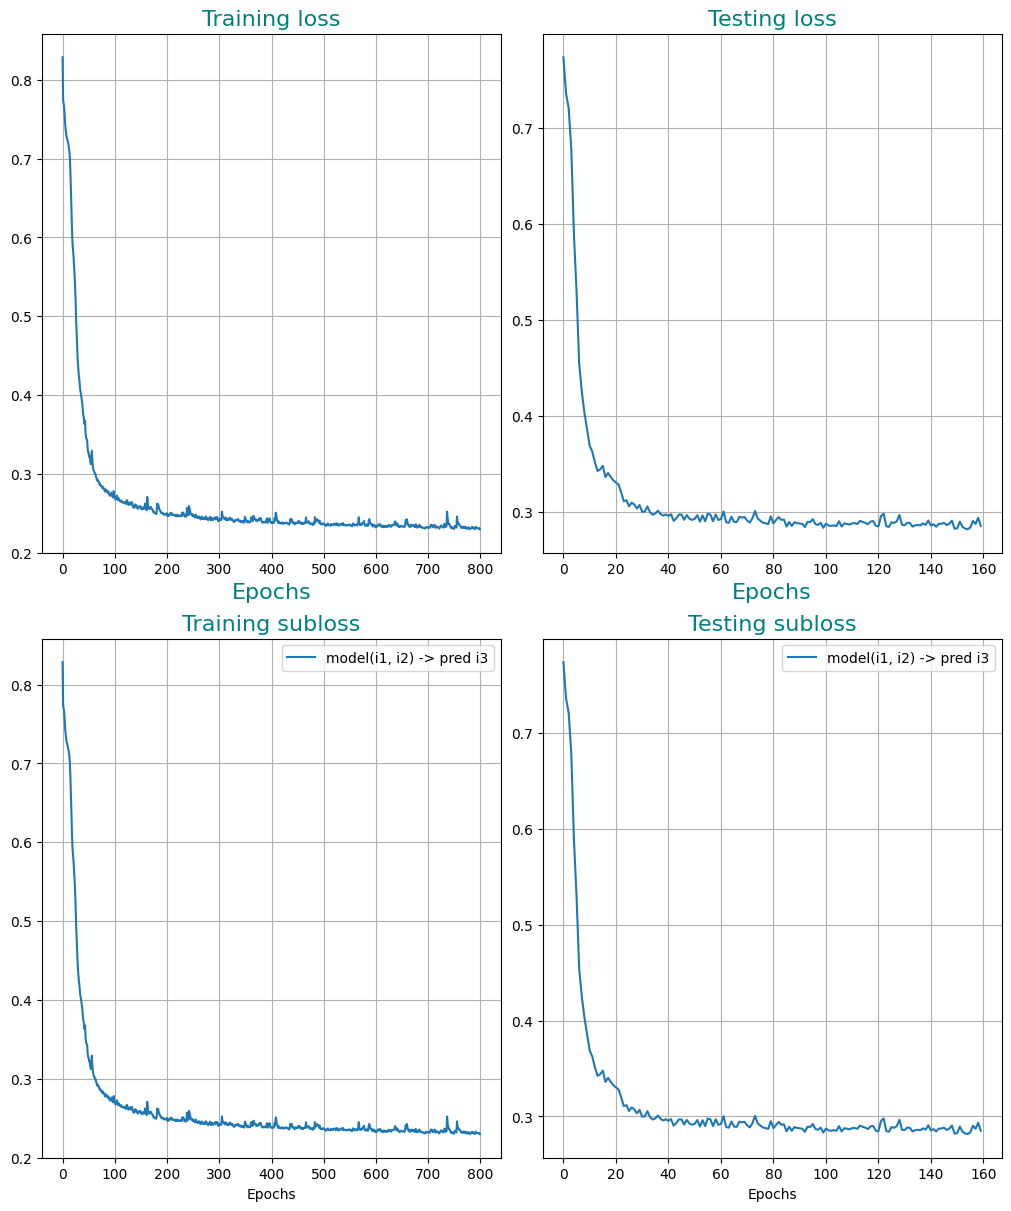

Number of model parameters: 9547
Training Loss: 0.14632940292358398
Training model(i1, i2) -> pred i3: 0.14632940292358398
Predicted velocity: [ 0.12597539  0.50583506 -0.8533822 ]
Ground truth velocity: [ 0 -1]


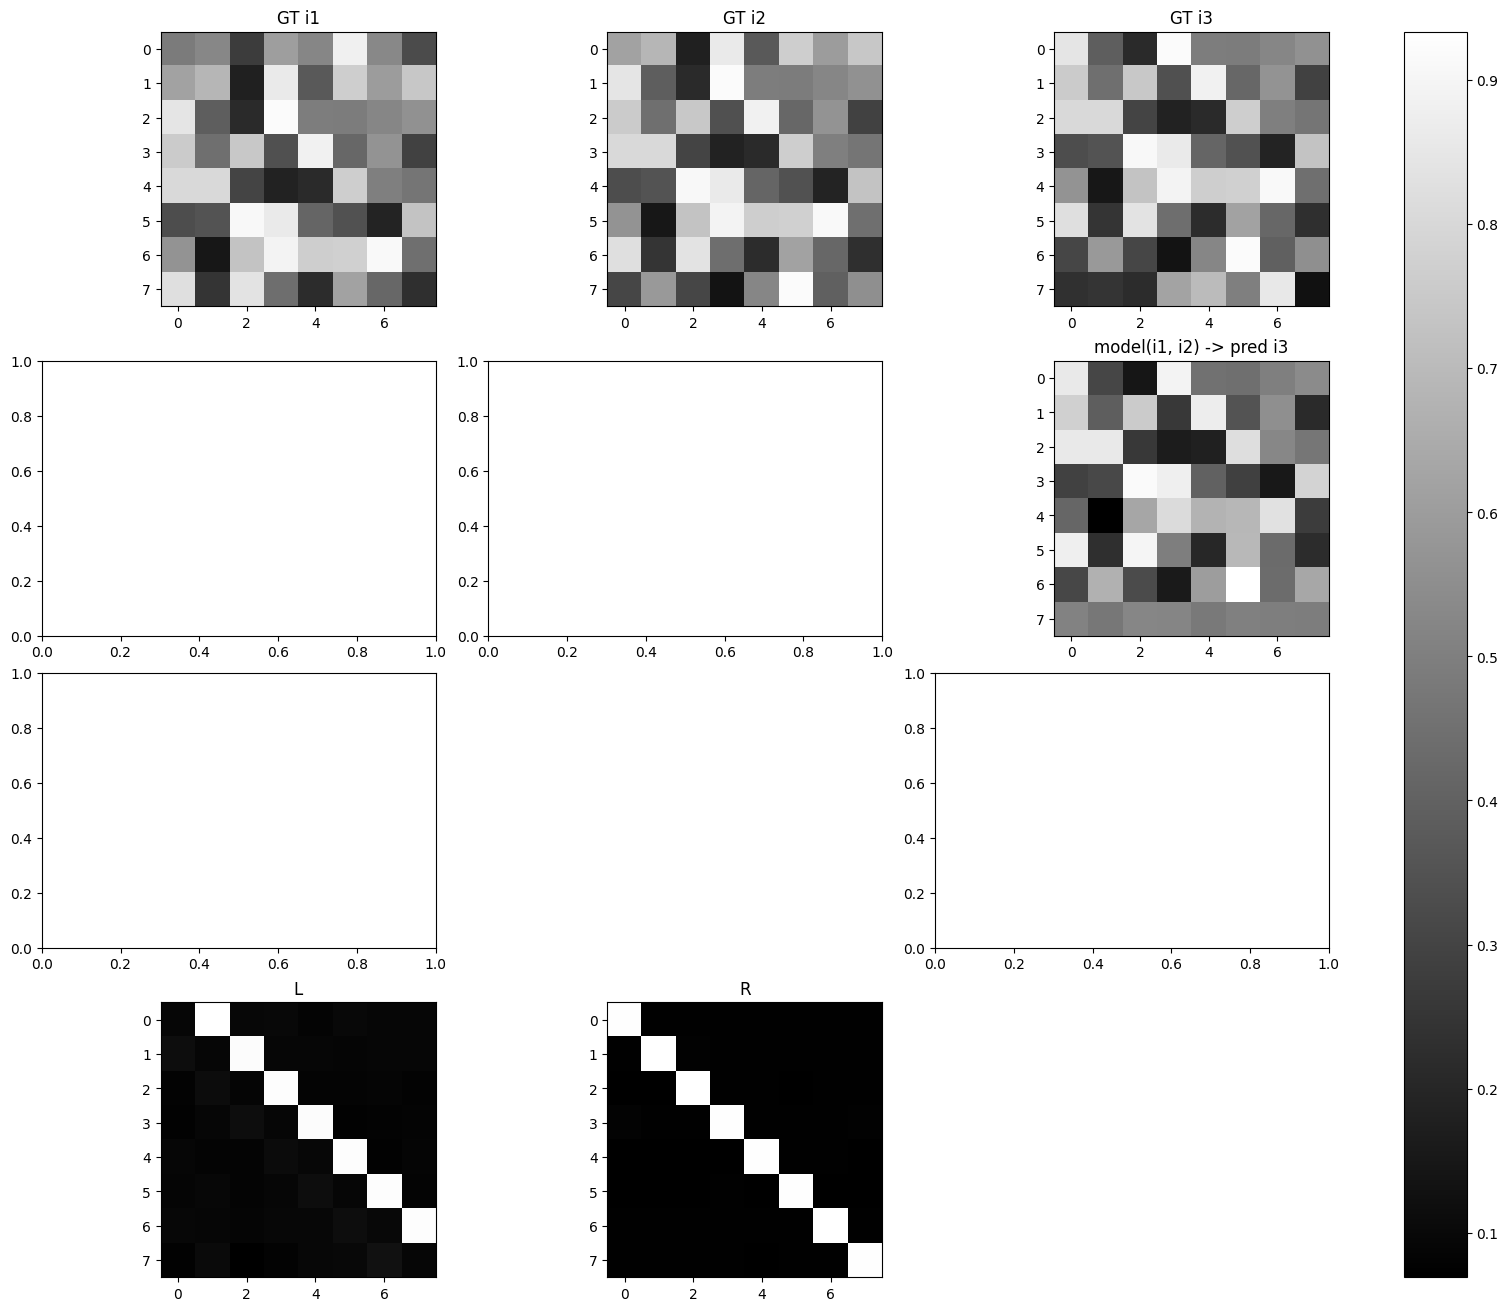

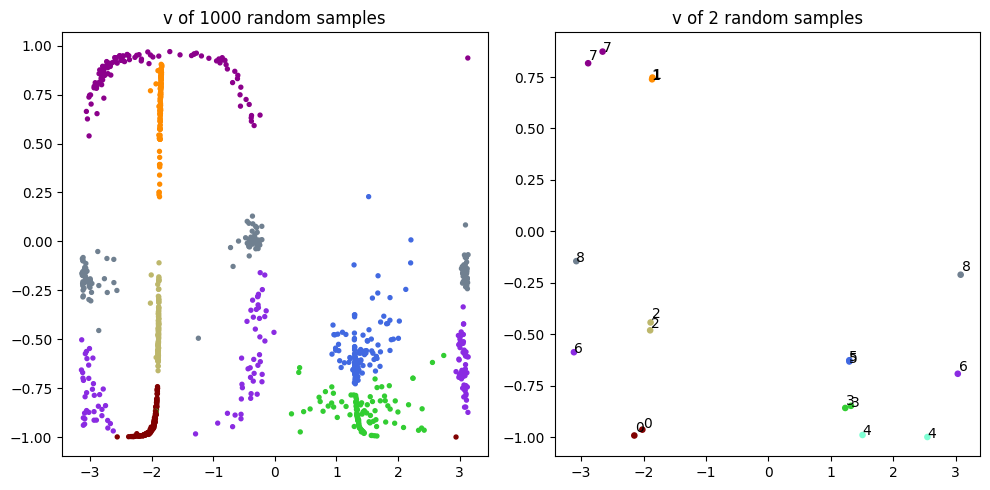

In [7]:
show_all_rand("shift1_rand_LR1_NoiseSweep1_1", "shift1_rand_LR1_NoiseSweep1", train=True)

In [ ]:
show_all_rand("shift1_rand_LR1_NoiseSweep2_1", "shift1_rand_LR1_NoiseSweep2", train=True)

In [ ]:
show_all_rand("shift1_rand_LR1_NoiseSweep3_1", "shift1_rand_LR1_NoiseSweep3", train=True)

In [ ]:
show_all_rand("shift1_rand_LR1_NoiseSweep4_1", "shift1_rand_LR1_NoiseSweep4", train=False)

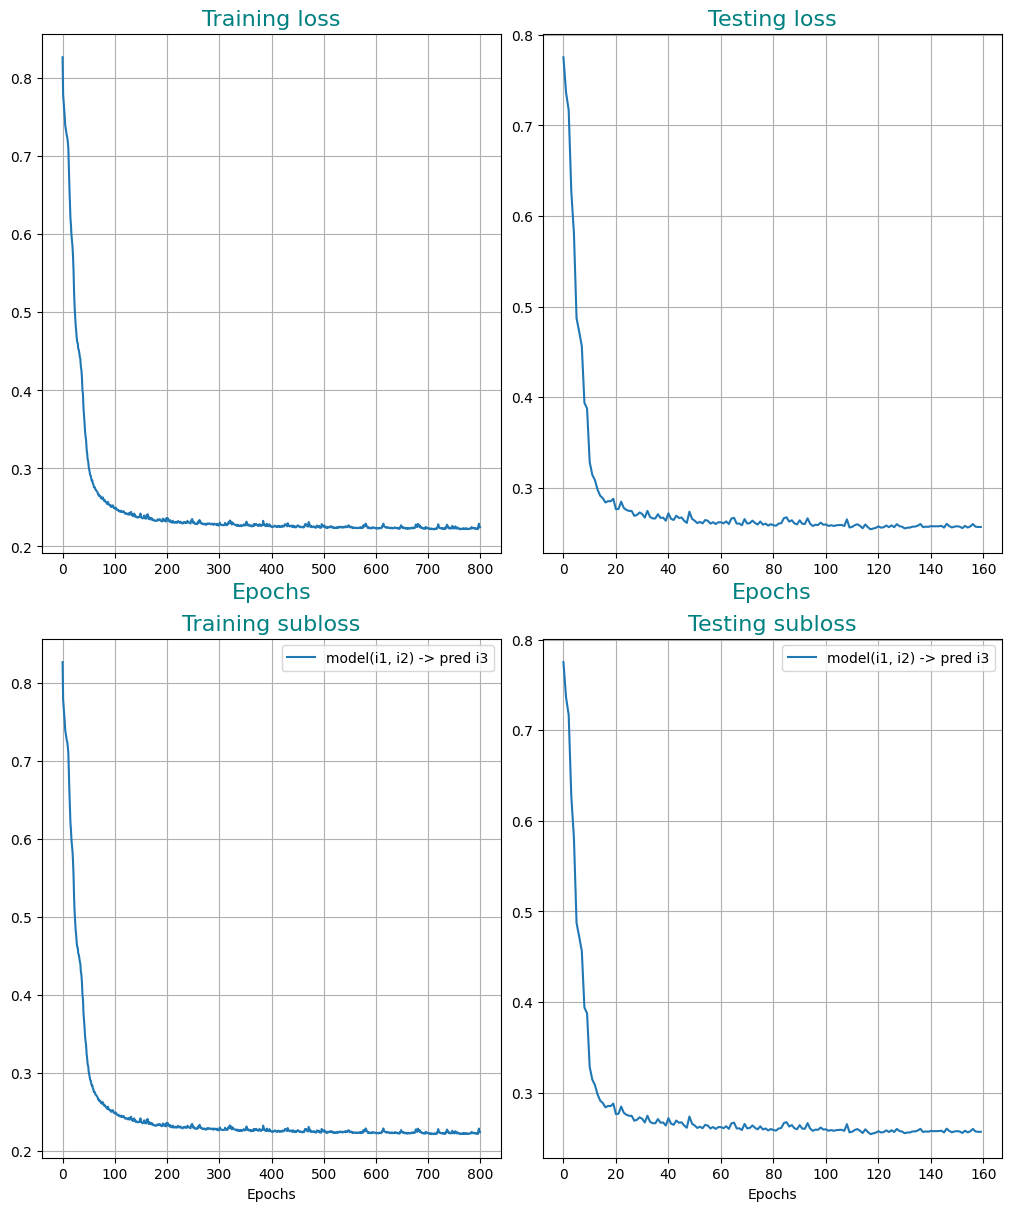

Number of model parameters: 9547
Training Loss: 0.25117921829223633
Training model(i1, i2) -> pred i3: 0.25117921829223633
Predicted velocity: [-0.93441254 -0.08902833 -0.34488714]
Ground truth velocity: [-1  1]


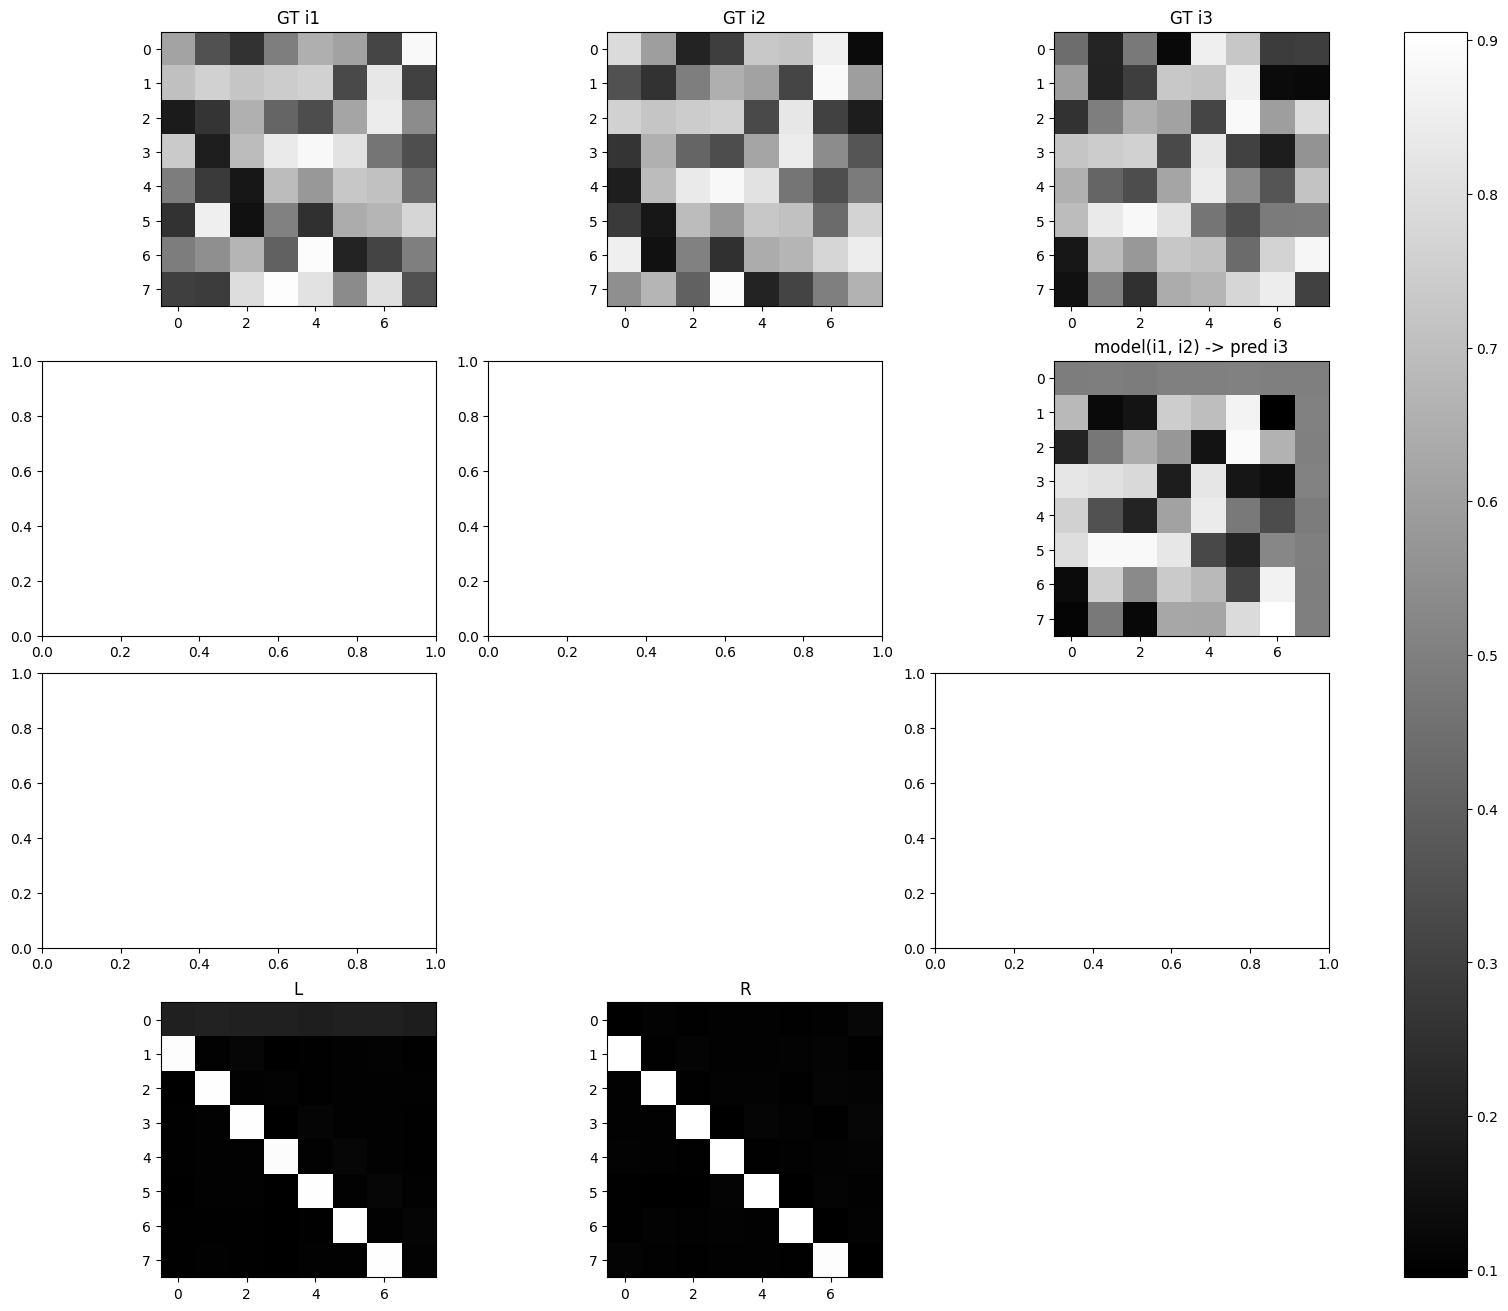

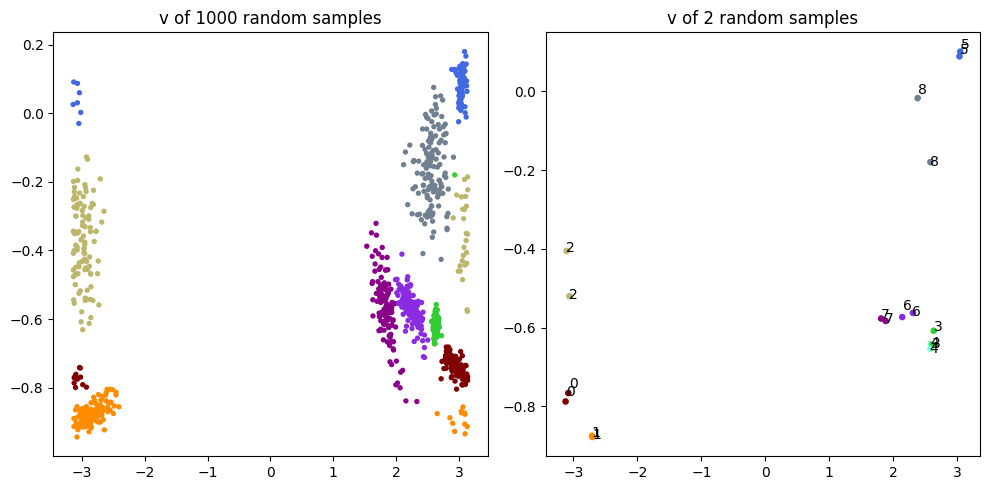

In [6]:
show_all_rand("shift1_rand_LR1_NoiseSweep5_1", "shift1_rand_LR1_NoiseSweep5", train=True)

In [ ]:
show_all_rand("shift1_rand_LR1_NoiseSweep6_1", "shift1_rand_LR1_NoiseSweep6", train=True)

In [ ]:
show_all_rand("shift1_rand_LR1_NoiseSweep7_1", "shift1_rand_LR1_NoiseSweep7", train=True)

In [ ]:
show_all_rand("shift1_rand_LR1_NoiseSweep8_1", "shift1_rand_LR1_NoiseSweep8", train=True)

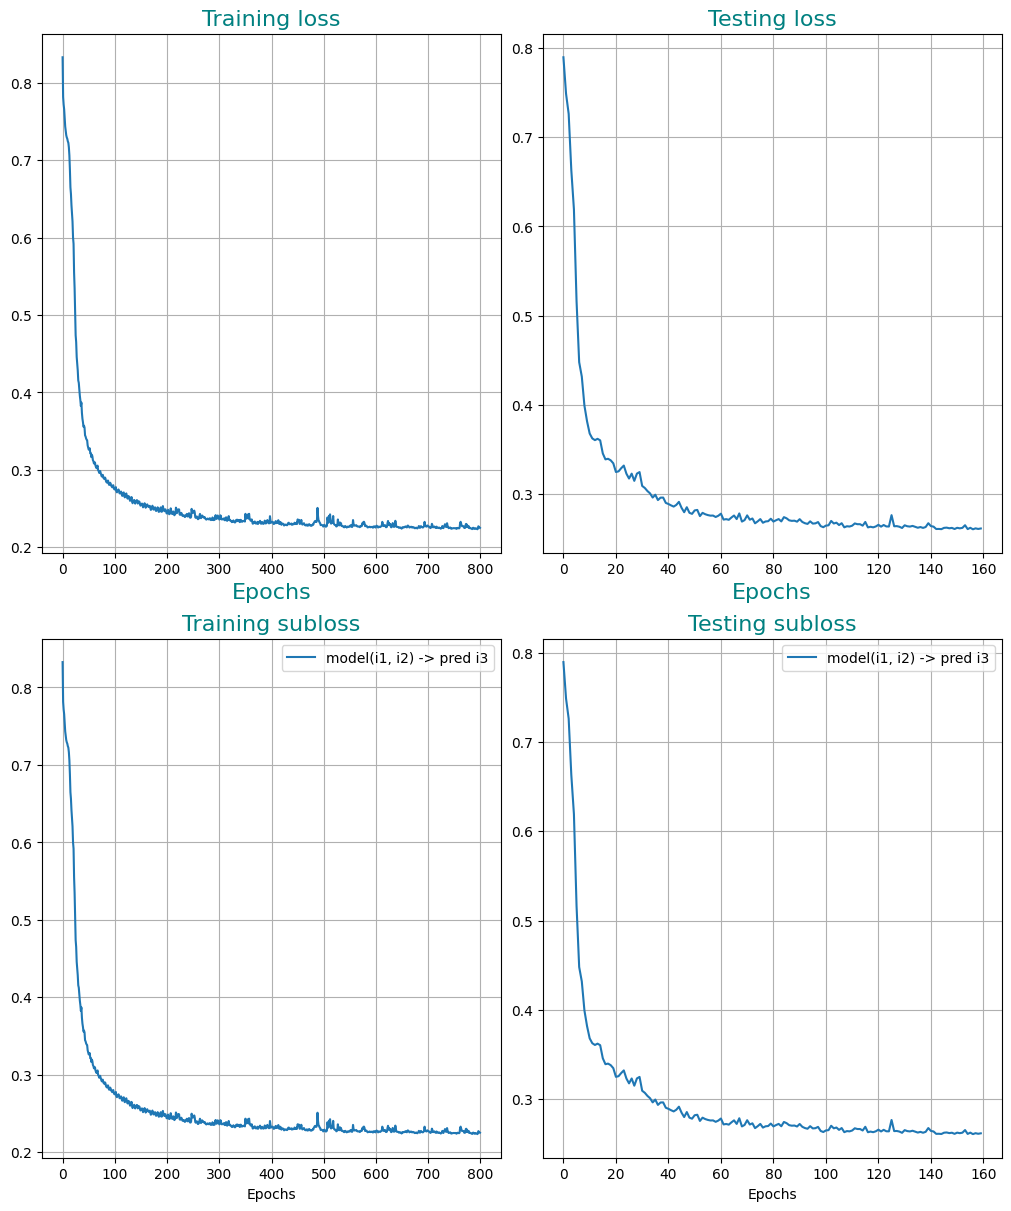

Number of model parameters: 9547
Training Loss: 0.24017858505249023
Training model(i1, i2) -> pred i3: 0.24017858505249023
Predicted velocity: [ 0.18300277  0.20452912 -0.96160173]
Ground truth velocity: [1 0]


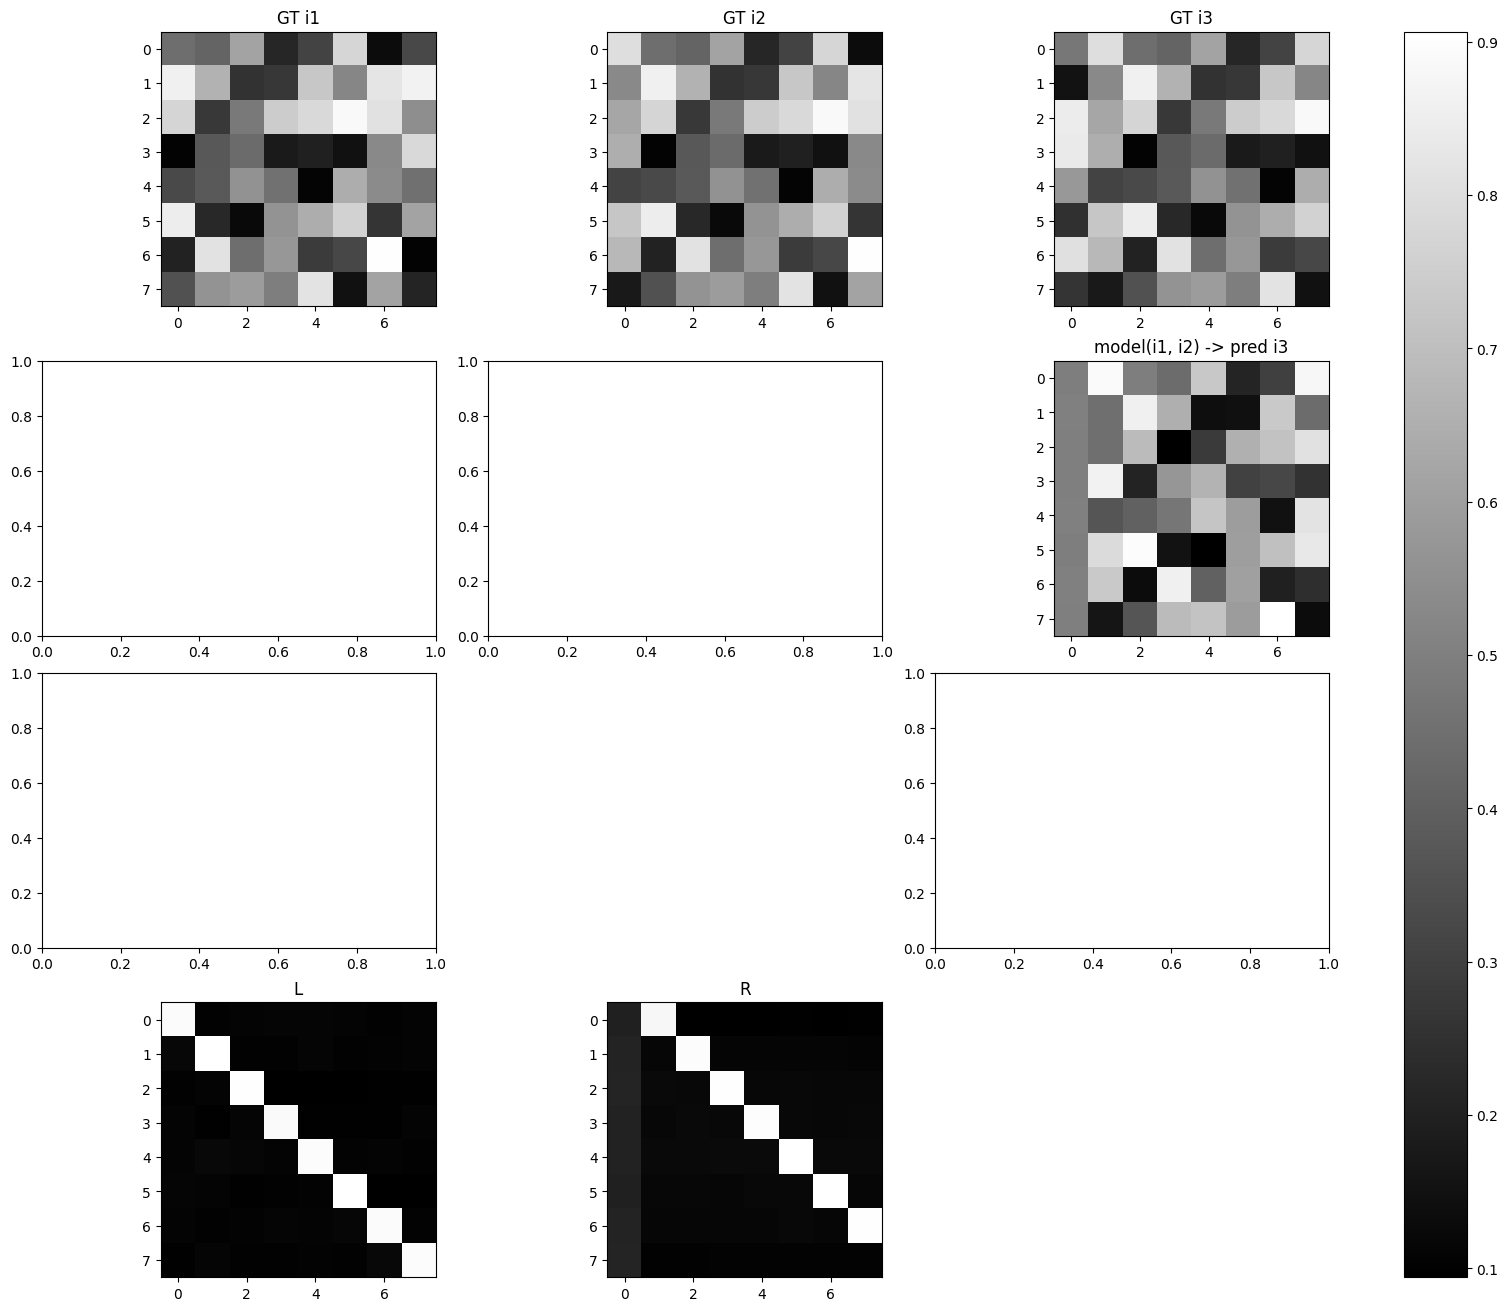

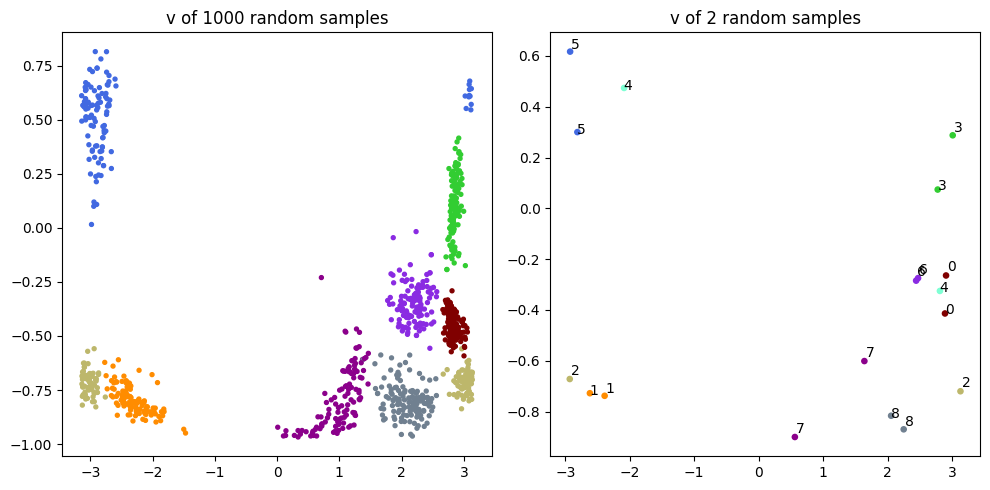

In [5]:
show_all_rand("shift1_rand_LR1_NoiseSweep9_1", "shift1_rand_LR1_NoiseSweep9", train=True)

In [ ]:
loader = DataLoader(ThreeRandomAllShifts(True, (8, 8), 1), batch_size=32)

In [ ]:
sample = next(iter(loader))

In [ ]:
def attraction_terms(bs):
    inds = list(combinations(torch.cartesian_prod(torch.arange(bs), torch.arange(9)).tolist(), r=2))

    all_inds = []

    for v in range(9):
        all_inds += list(filter(lambda x : (x[0][1] == v and x[1][1] == v), inds))

    all_inds = torch.Tensor(all_inds).long()
    
    return [
        all_inds[:, 0, :][:, 0].long().tolist(), all_inds[:, 0, :][:, 1].long().tolist()
    ], [
        all_inds[:, 1, :][:, 0].long().tolist(), all_inds[:, 1, :][:, 1].long().tolist()
    ]

attract_first, attract_second = attraction_terms(32)

In [ ]:
def repel_terms(bs):
    inds = list(combinations(torch.cartesian_prod(torch.arange(bs), torch.arange(9)).tolist(), r=2))

    all_inds = []

    for v in range(9):
        all_inds += list(filter(lambda x : (x[0][1] == v and x[1][1] != v), inds))

    all_inds = torch.Tensor(all_inds).long()
    
    return [
        all_inds[:, 0, :][:, 0].long().tolist(), all_inds[:, 0, :][:, 1].long().tolist()
    ], [
        all_inds[:, 1, :][:, 0].long().tolist(), all_inds[:, 1, :][:, 1].long().tolist()
    ]

repel_first, repel_second = repel_terms(32)

In [ ]:
sample[attract_first].shape[0] + sample[repel_first].shape[0]

In [ ]:
sample.view(-1, 3, 8, 8).shape